## Plant Leaf Recognition Model

### Introduction
Plant leaf recognition is the process of identifying different types of plant species based on their leaf characteristics such as shape, size, color, texture, and vein patterns. This process is important in many fields, including agriculture, ecology, and conservation, as it can help researchers and farmers identify different plant species and monitor their growth and health.

### Dataset

The Flavia dataset, which includes 1909 images of leaves in 32 categories, is the source for this model. The images, which have a high resolution of 1600x1200 pixels. 

In the image below, the names of the plants' corresponding image files are listed, along with labels that correspond to each categories.

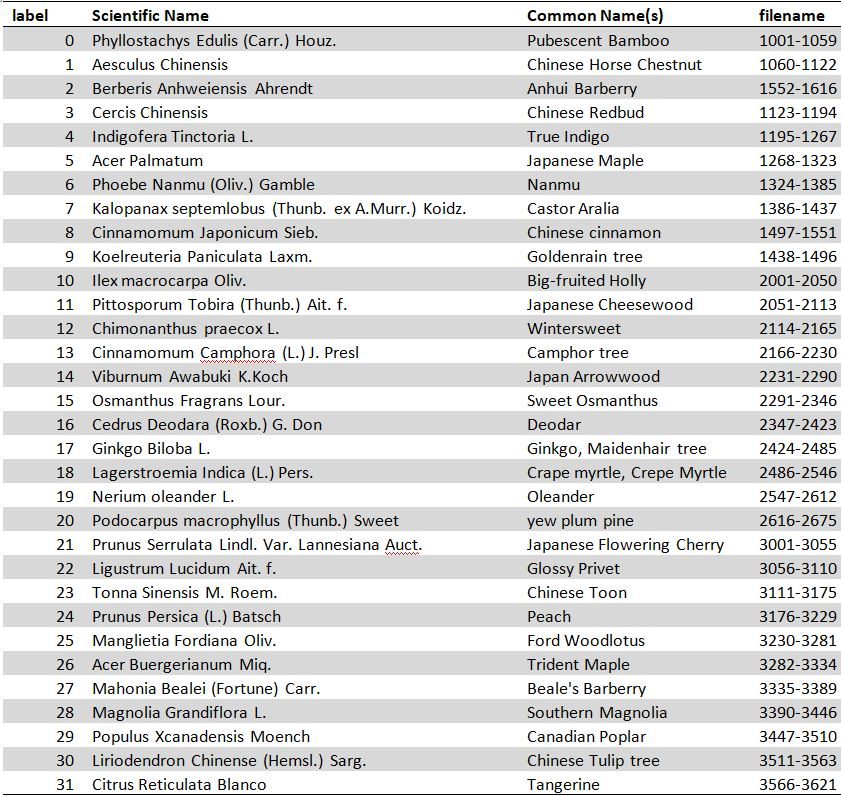

Image Source - https://flavia.sourceforge.net/

Dataset source - Flavia dataset (https://www.kaggle.com/code/kerneler/starter-flavia-dataset-ac6ca577-2/input)

In [1]:
# Importing libraries
import numpy as np #array and matrices
import pandas as pd  # data analysis and manipulation
import matplotlib.pyplot as plt  # plotting graphs
from sklearn.model_selection import train_test_split  # train test - split images

In [2]:
# Read the data
df = pd.read_csv('all.csv', index_col='id')
df.head(10)

,img_name,label
id,,
0,1300.jpg,5
1,3152.jpg,23
2,1439.jpg,9
3,1243.jpg,4
4,1186.jpg,3
5,1452.jpg,9
6,2063.jpg,11
7,1522.jpg,8
8,2007.jpg,10


In [3]:
# Print unique labels which referred to class names
u_class = df['label'].unique()
sorted_class = sorted(u_class)
print(sorted_class)

# There are 32 uniques classes in total

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [4]:
# Train-test split
x = df['img_name']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [5]:
type(X_test)

pandas.core.series.Series

In [6]:
import cv2
import os

In [7]:
# Load the images
def load_images(folder, image_names):
    images = []
    for _, filename in enumerate(image_names):
        img = cv2.imread(os.path.join(folder,filename))
        images.append(img)
    return(images)

In [8]:
folder = r'C:\Users\NIDHI\NIDHI UK\Applications of ML\Project\Leaves'
x_train = load_images(folder,X_train)
x_test = load_images(folder, X_test)

In [9]:
type(x_train)

list

In [10]:
x_train = np.array(x_train)
x_test = np.array(x_test)
x_train.shape # w=1600, h=1200

(1334, 1200, 1600, 3)

In [11]:
x_test.shape # w=1600, h=1200

(573, 1200, 1600, 3)

In [12]:
y_train.shape

(1334,)

In [13]:
y_test.shape

(573,)

In [15]:
import tensorflow as tf

In [16]:
x_train = tf.image.resize(x_train, [256,256])

In [17]:
x_train.shape

TensorShape([1334, 256, 256, 3])

In [18]:
type(x_train)

tensorflow.python.framework.ops.EagerTensor

In [19]:
x_test = tf.image.resize(x_test, [256,256])

In [20]:
x_test.shape

TensorShape([573, 256, 256, 3])

In [21]:
# Normalisation
x_train = x_train/255.0
x_test = x_test/255.0

In [22]:
y_train = np.array(y_train)
y_test = np.array(y_test)

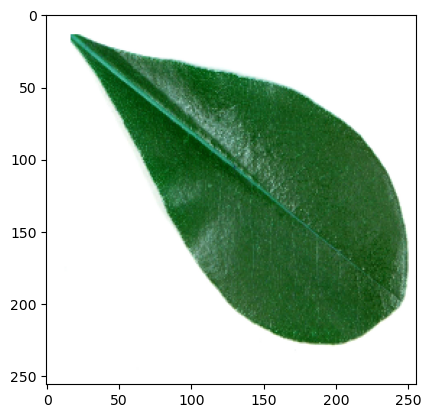

In [23]:
#show one image
plt.figure()
plt.imshow(x_train[0])
#plt.colorbar()
plt.grid(False)
plt.show()

In [24]:

# Transformation
from keras.preprocessing.image import ImageDataGenerator
data_gen = ImageDataGenerator(
                rotation_range = 40, 
                shear_range = 0.2,
                zoom_range = 0.2,
                horizontal_flip = True, 
                brightness_range = (0.5, 1.5))
train_gen = data_gen.flow(x_train, batch_size = 20)
test_gen = data_gen.flow(x_test, batch_size = 20)


In [65]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
cnn = models.Sequential([
layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=x_train.shape[1:], activation='relu', name='Conv2D_1'),    
layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', name='Conv2D_2'), 
layers.MaxPool2D(pool_size=(2,2), name='Maxpool_1'),
    
    layers.Dropout(0.25),
    layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_3'), 
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', name='Conv2D_4'), 
    layers.MaxPool2D(pool_size=(2,2), name='Maxpool_2'),
    layers.Dropout(0.25),
    layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_5'), 
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', name='Conv2D_6'),
    layers.MaxPool2D(pool_size=(2,2), name='Maxpool_3'),
    layers.Flatten(),
    layers.Dense(units=512, activation='relu', name='Dense_1'),
    layers.Dropout(0.5),
    layers.Dense(units=128, activation='relu', name='Dense_2'),
    layers.Dense(units=32, activation='softmax', name='Output')   
])

cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_1 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 Conv2D_2 (Conv2D)           (None, 254, 254, 32)      9248      
                                                                 
 Maxpool_1 (MaxPooling2D)    (None, 127, 127, 32)      0         
                                                                 
 dropout_9 (Dropout)         (None, 127, 127, 32)      0         
                                                                 
 Conv2D_3 (Conv2D)           (None, 127, 127, 64)      18496     
                                                                 
 Conv2D_4 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 Maxpool_2 (MaxPooling2D)    (None, 62, 62, 64)       

In [25]:
'''# Build the model
from tensorflow.keras import datasets, layers, models
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
  #  layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
   # layers.MaxPooling2D((2,2)),
        
#    layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
 #   layers.MaxPooling2D((2,2)), 
    
#    layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu'),
#    layers.MaxPooling2D((2,2)),
        
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(32, activation='softmax')
    
])

cnn.summary()'''

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 128)               3

In [66]:
# Compile
cnn.compile(optimizer='RMSprop',
           loss = 'sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [67]:
# Train the model 
history=cnn.fit(x_train, y_train, epochs=40,validation_data =(x_test,y_test),
                    
                # Boolean (whether to shuffle the training data before each epoch)
                    shuffle = True,
                
                # 1 = progress bar printing
                    verbose = 1)

Epoch 1/40
42/42 [==============================] - 196s 5s/step - loss: 5.2912 - accuracy: 0.0472 - val_loss: 3.2127 - val_accuracy: 0.1361
Epoch 2/40
42/42 [==============================] - 203s 5s/step - loss: 2.8923 - accuracy: 0.1942 - val_loss: 1.8366 - val_accuracy: 0.4607
Epoch 3/40
42/42 [==============================] - 200s 5s/step - loss: 1.7531 - accuracy: 0.4873 - val_loss: 1.2849 - val_accuracy: 0.5986
Epoch 4/40
42/42 [==============================] - 205s 5s/step - loss: 1.1905 - accuracy: 0.6327 - val_loss: 1.0407 - val_accuracy: 0.6911
Epoch 5/40
42/42 [==============================] - 202s 5s/step - loss: 0.9146 - accuracy: 0.7241 - val_loss: 0.9690 - val_accuracy: 0.7400
Epoch 6/40
42/42 [==============================] - 202s 5s/step - loss: 0.7068 - accuracy: 0.7811 - val_loss: 0.9936 - val_accuracy: 0.7120
Epoch 7/40
42/42 [==============================] - 201s 5s/step - loss: 0.4904 - accuracy: 0.8531 - val_loss: 0.8210 - val_accuracy: 0.7417
Epoch 8/40
42

In the beginning, this model showed the accuracy of only 0.04 (4%) then after training and changing layers, it reaches an accuracy of about 0.97 (or 97%) on the training data.

In [68]:
losses = pd.DataFrame(cnn.history.history)

In [69]:
losses.head(8)

,loss,accuracy,val_loss,val_accuracy
0,5.291216,0.047226,3.212719,0.136126
1,2.892281,0.194153,1.836632,0.460733
2,1.753097,0.487256,1.284925,0.598604
3,1.190543,0.632684,1.040733,0.691099
4,0.914608,0.724138,0.968954,0.739965
5,0.706778,0.781109,0.993561,0.712042
6,0.490385,0.853073,0.821025,0.741710
7,0.420909,0.871814,0.792768,0.760908


<AxesSubplot: >

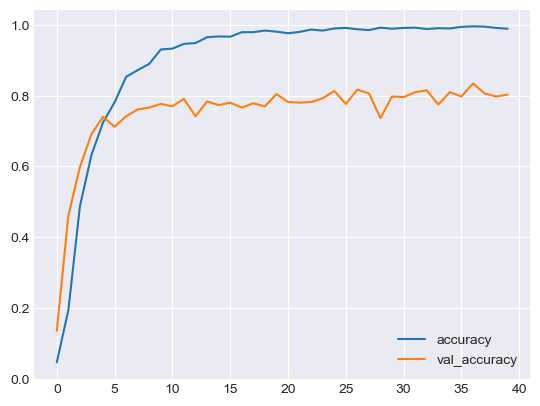

In [70]:
# plot accuracy and val_accuracy wrt the epochs

losses[['accuracy','val_accuracy']].plot()

C:\Users\NIDHI\AppData\Local\Temp\ipykernel_9876\2543472966.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


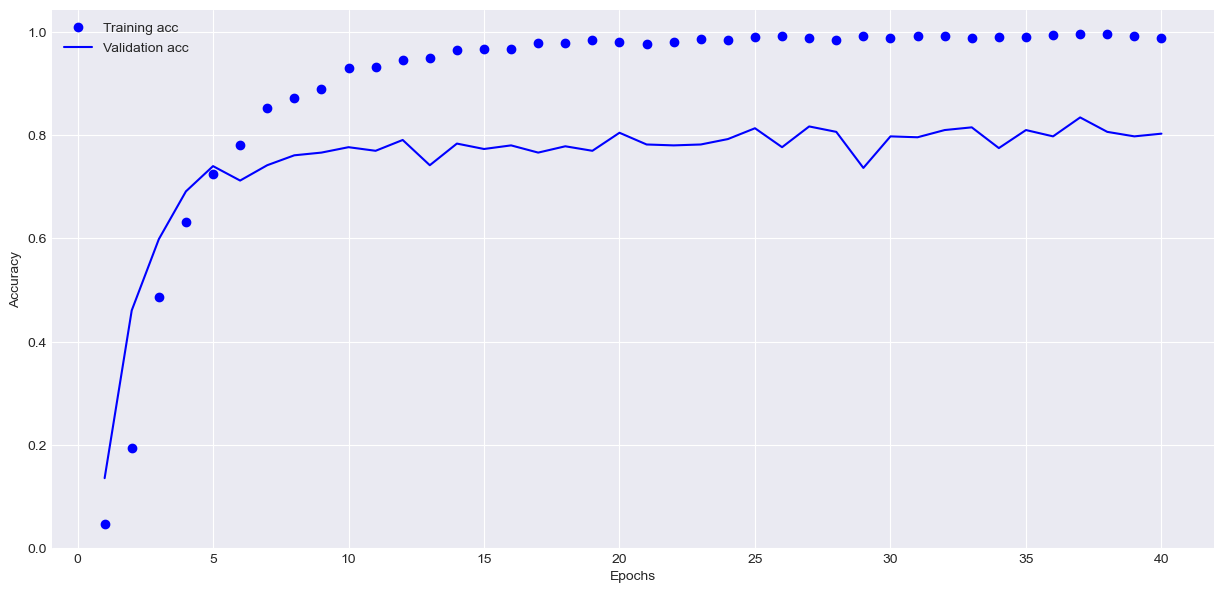

In [71]:
# printing Accuracy for the neural network training process

history_dict = history.history
plt.style.use('seaborn-darkgrid')

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

<AxesSubplot: >

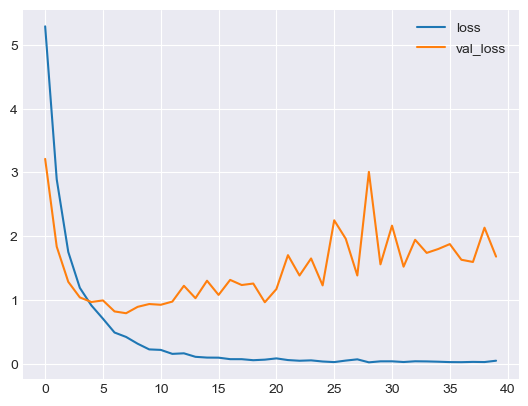

In [72]:
# plot loss and val_loss wrt the epochs

losses[['loss','val_loss']].plot()

C:\Users\NIDHI\AppData\Local\Temp\ipykernel_9876\4006879425.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


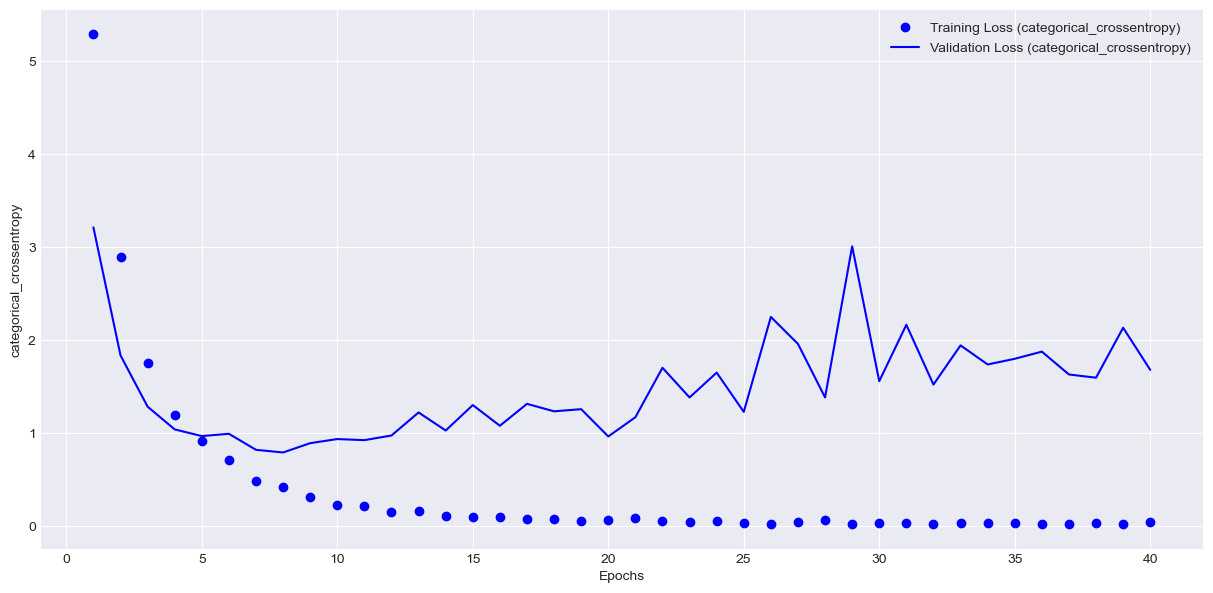

In [73]:
# printing Loss function (categorical_crossentropy) for the neural network training process

history_dict = history.history
plt.style.use('seaborn-darkgrid')

acc_values = history_dict['loss']
val_acc_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training Loss (categorical_crossentropy)')
plt.plot(epochs, val_acc_values, 'b', label='Validation Loss (categorical_crossentropy)')
plt.xlabel('Epochs')
plt.ylabel('categorical_crossentropy')
plt.legend()

plt.show()

In [74]:
cnn.metrics_names

['loss', 'accuracy']

In [75]:
cnn.evaluate(x_test,y_test,verbose=1)

18/18 [==============================] - 13s 749ms/step - loss: 1.6806 - accuracy: 0.8028


[1.6806434392929077, 0.8027923107147217]

In [98]:
#cnn.evaluate(x_test, y_test)

At first,  loss of test dataset was about 3312.5 and accuracy was almost ~0. 
Then, it turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset.

split - 80-20 -> test loss 0.
split - 70-30 -> test loss 0.99, test acc -> 0.83
rmsprp&sparse -> loss = 2.33, acc 0.77
rmsprp&sparse new -> loss = 1.68, acc=0.80

In [76]:
#Make predictions

In [77]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[4.27320874e-25, 6.81505981e-07, 3.42311006e-22, 1.26894328e-11,
        4.56526110e-21, 5.36669508e-19, 5.24931552e-13, 2.86874686e-15,
        5.73455942e-13, 1.82104474e-17, 9.65157843e-10, 1.51669301e-20,
        1.69652598e-10, 6.18591400e-09, 9.59976151e-15, 2.35361210e-03,
        4.35497771e-19, 7.38125855e-14, 2.98370913e-14, 1.43417891e-22,
        2.06114332e-27, 7.54205726e-11, 9.97645676e-01, 2.02071619e-14,
        4.87989536e-18, 2.15914204e-15, 1.78748728e-15, 1.36949254e-11,
        2.46968362e-10, 1.86386727e-13, 1.90419088e-14, 2.30672616e-11],
       [1.33502608e-17, 4.40986330e-17, 3.16879095e-24, 2.40468520e-14,
        1.51942561e-20, 3.38760012e-18, 4.17393333e-13, 2.67745123e-26,
        2.02095730e-15, 2.09592366e-22, 1.30757133e-11, 1.89459681e-18,
        1.79910920e-15, 5.55663676e-14, 1.13467021e-24, 3.01291206e-19,
        1.53692772e-25, 9.41107435e-13, 1.00000000e+00, 1.70184656e-18,
        1.67523486e-22, 6.21147706e-19, 3.45653863e-17, 4.06026

In [78]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[22, 18, 17, 4, 19]

In [79]:
leaf_df = pd.read_csv('cls.csv')
leaf_df.head()

,label,Scientific Name,Common Name(s),filename
0,0,Phyllostachys edulis (Carr.) Houz.,pubescent bamboo,1001-1059
1,1,Aesculus chinensis,Chinese horse chestnut,1060-1122
2,2,Berberis anhweiensis Ahrendt,Anhui Barberry,1552-1616
3,3,Cercis chinensis,Chinese redbud,1123-1194
4,4,Indigofera tinctoria L.,true indigo,1195-1267


In [80]:
list(leaf_df.columns)

['label', 'Scientific Name', 'Common Name(s)', 'filename']

In [81]:
classes = leaf_df['Common Name(s)'].tolist()                 # row indices
print(classes)

['pubescent bamboo', 'Chinese horse chestnut', 'Anhui Barberry', 'Chinese redbud', 'true indigo', 'Japanese maple', 'Nanmu', 'castor aralia', 'Chinese cinnamon', 'goldenrain tree', 'Big-fruited Holly', 'Japanese cheesewood', 'wintersweet', 'camphortree', 'Japan Arrowwood', 'sweet osmanthus', 'deodar', 'ginkgo, maidenhair tree', 'Crape myrtle, Crepe myrtle', 'oleander', 'yew plum pine', 'Japanese Flowering Cherry', 'Glossy Privet', 'Chinese Toon', 'peach', 'Ford Woodlotus', 'trident maple', "Beale's barberry", 'southern magnolia', 'Canadian poplar', 'Chinese tulip tree', 'tangerine']


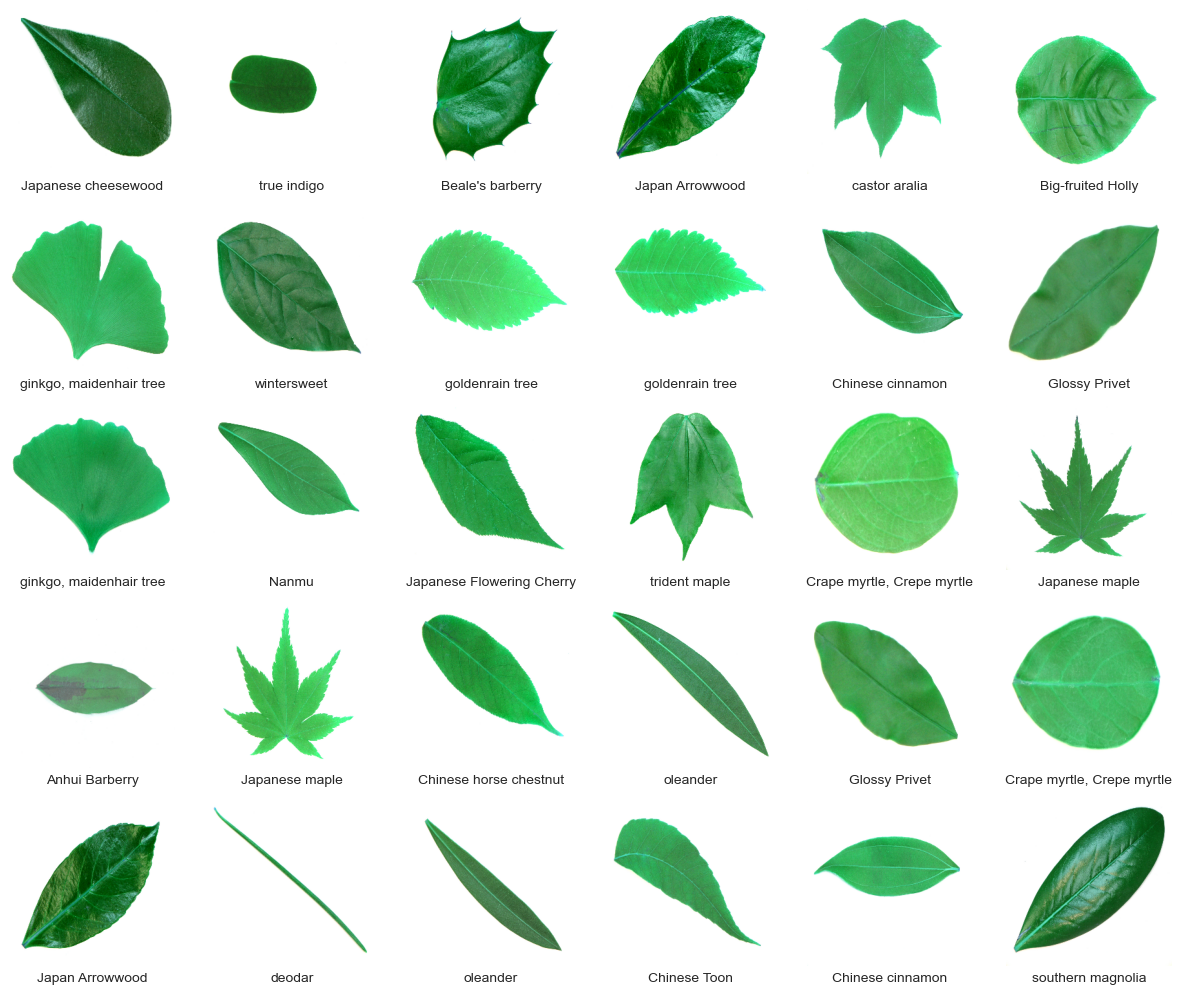

In [82]:
# Show all categories images
plt.figure(figsize=(15,15))
for i in range(30):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])
plt.show()

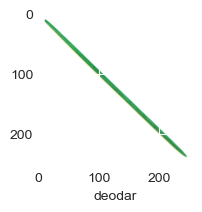

In [83]:
def plot_img(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
plot_img(x_test, y_test, 7)

In [84]:
X_test.iloc[7]

'2364.jpg'

In [85]:
y_test[7]

16

In [86]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = cnn.predict(x_test)
y_pred_classes= [np.argmax(item) for item in y_pred]

print("Classification Report : \n", classification_report(y_test, y_pred_classes))

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        20
           1       0.70      0.61      0.65        23
           2       0.78      0.93      0.85        15
           3       0.77      0.85      0.81        20
           4       1.00      0.93      0.97        15
           5       0.91      0.91      0.91        23
           6       0.85      0.89      0.87        19
           7       0.83      0.91      0.87        11
           8       0.56      0.71      0.63        21
           9       0.92      0.79      0.85        14
          10       0.87      0.72      0.79        18
          11       0.88      1.00      0.93        21
          12       0.53      1.00      0.69         9
          13       0.64      0.80      0.71        20
          14       0.58      0.94      0.71        16
          15       0.67      0.56      0.61        18
          16       1.00      1.00      1.00        20
 

In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_classes)

array([[14,  0,  1, ...,  0,  0,  0],
       [ 0, 14,  0, ...,  0,  0,  0],
       [ 0,  0, 14, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 14,  0,  0],
       [ 0,  0,  0, ...,  1, 10,  0],
       [ 0,  0,  0, ...,  0,  0, 18]], dtype=int64)

<AxesSubplot: >

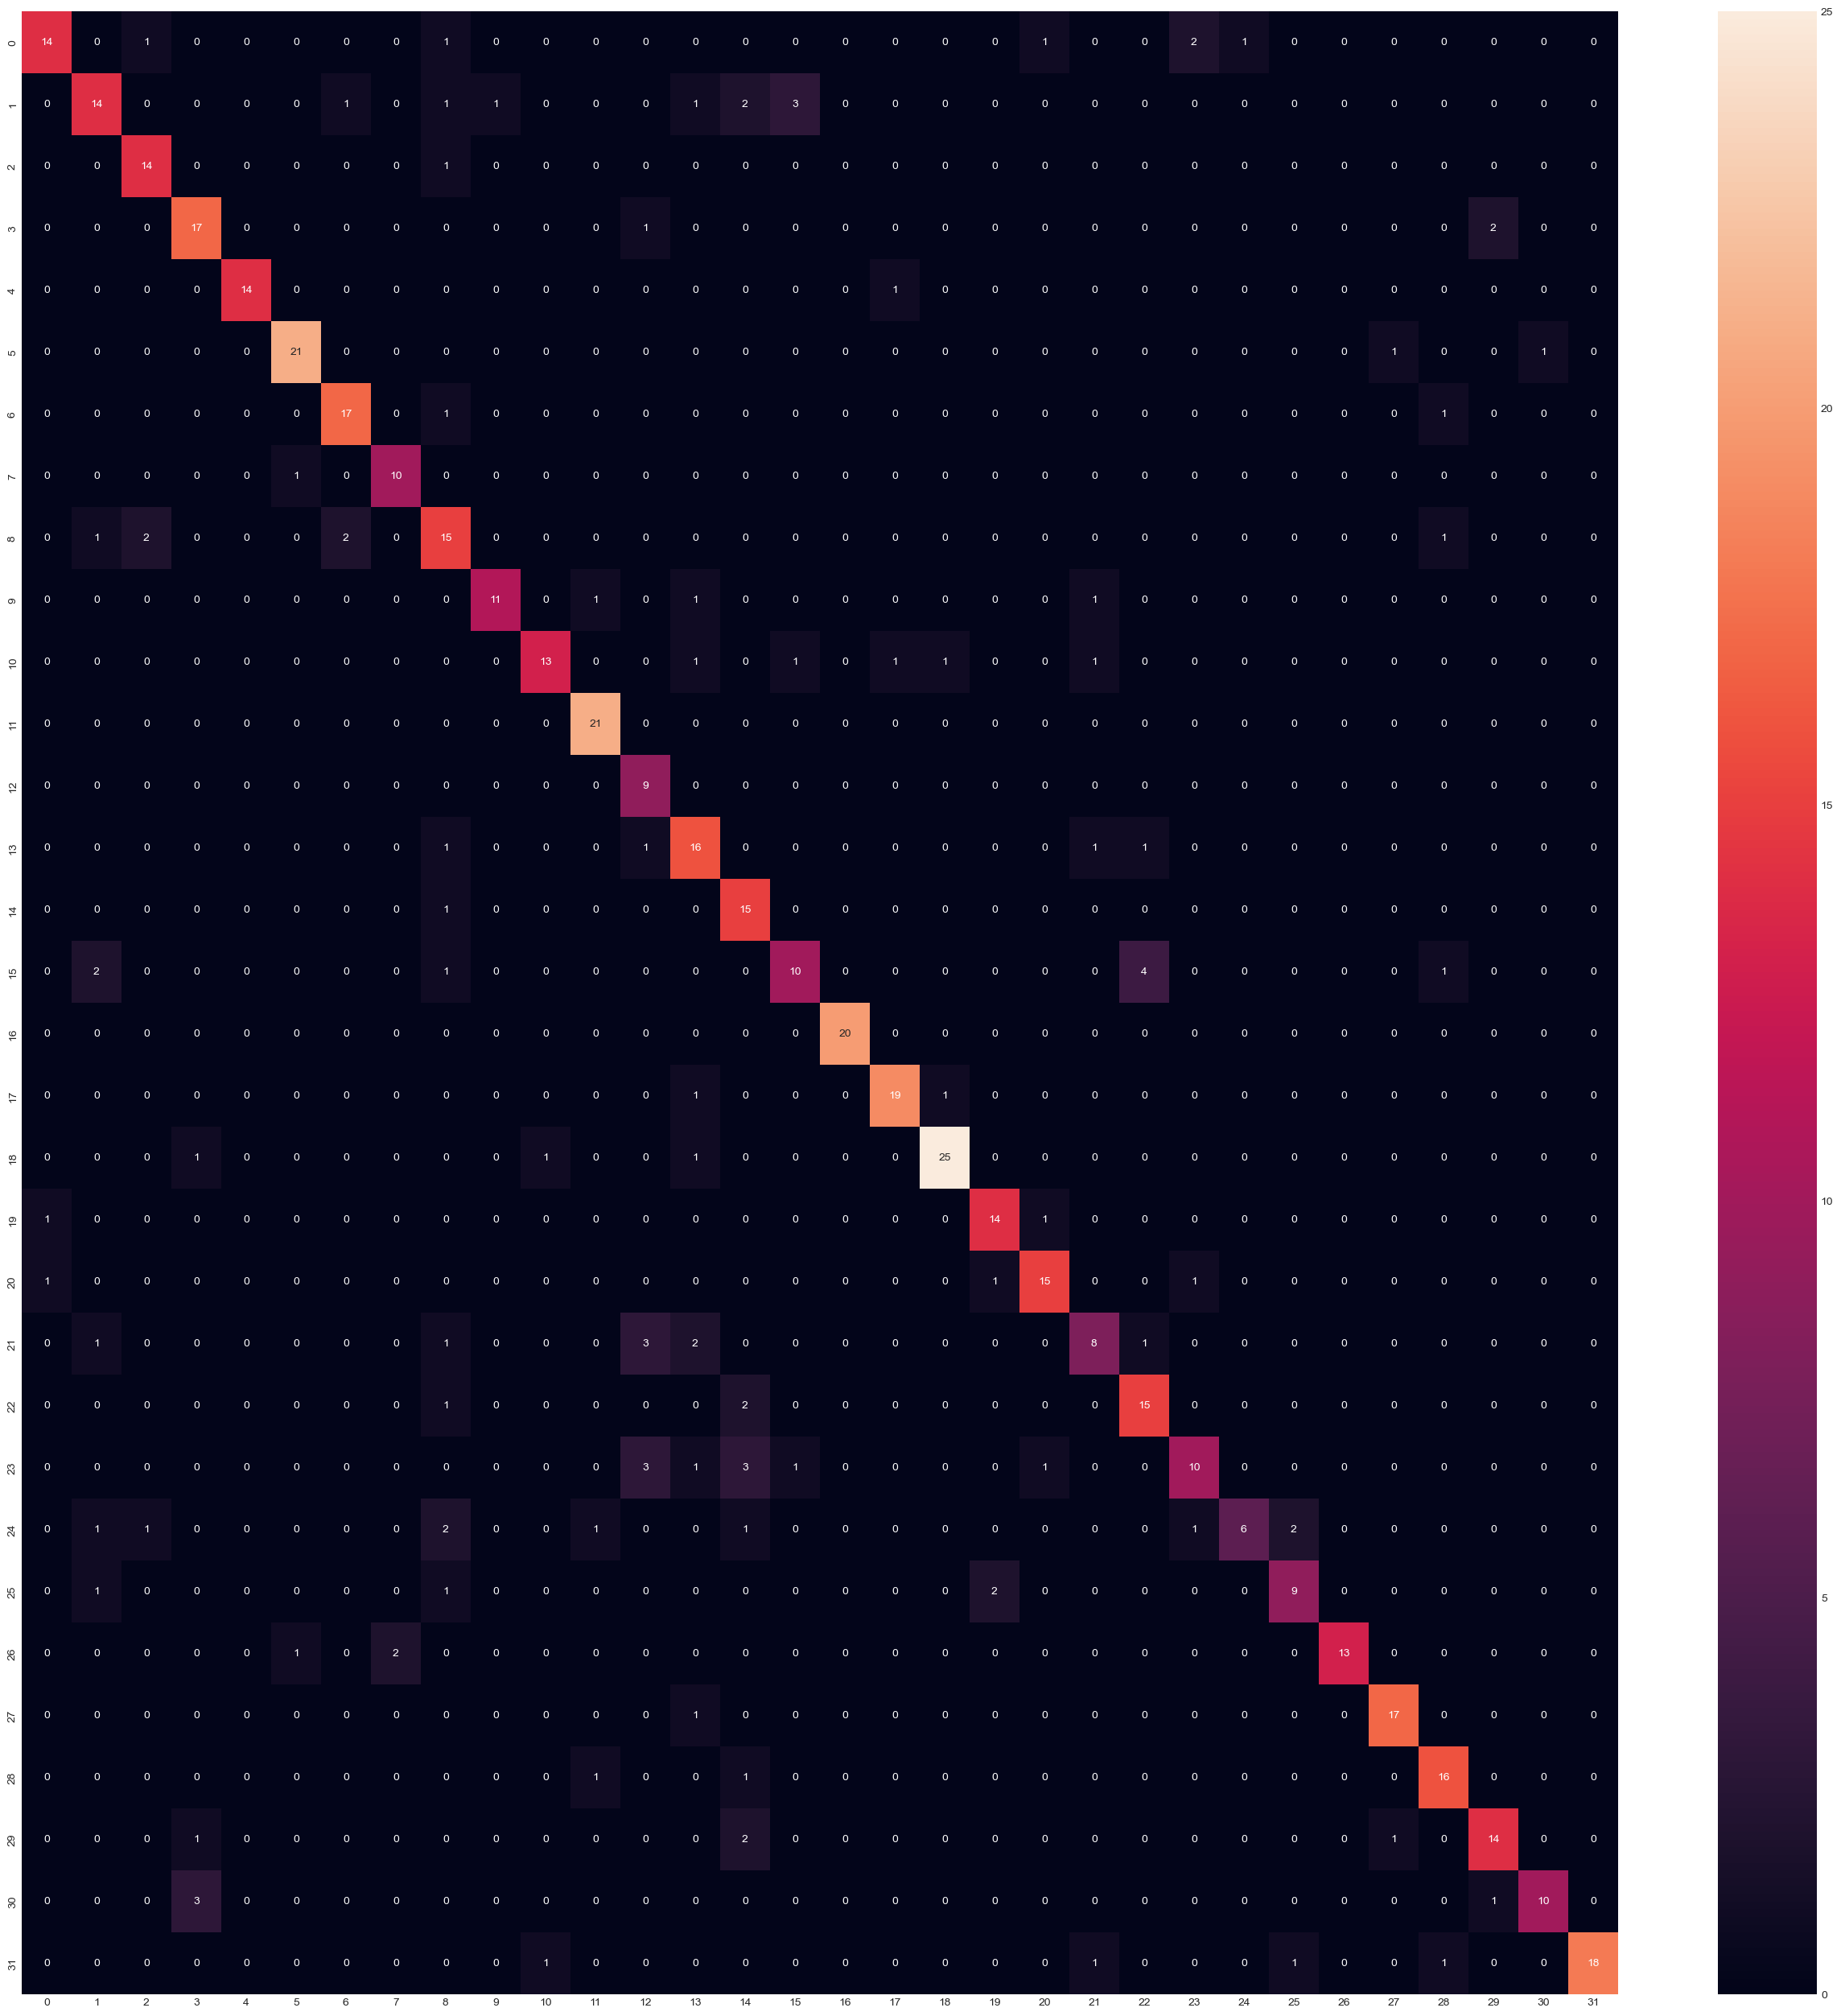

In [88]:
import seaborn as sns

plt.figure(figsize=(32,32))
sns.heatmap(confusion_matrix(y_test,y_pred_classes),annot=True)


In [89]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                100*np.max(predictions_array),
                                classes[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(32))
    plt.yticks([])
    thisplot = plt.bar(range(32), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### Verifying predictions

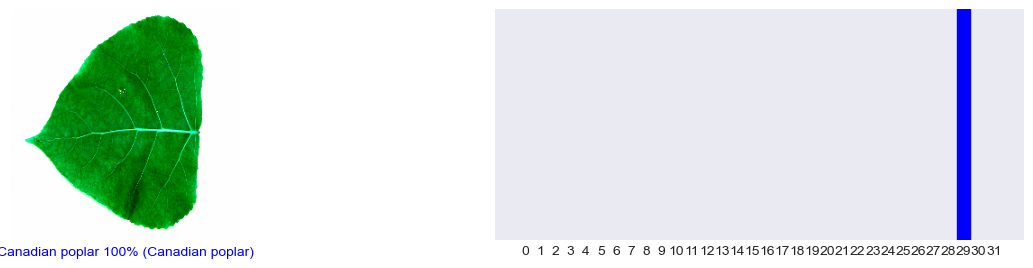

In [90]:
i = 9 
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plot_image(i, y_pred[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, y_pred[i],  y_test)
plt.show()

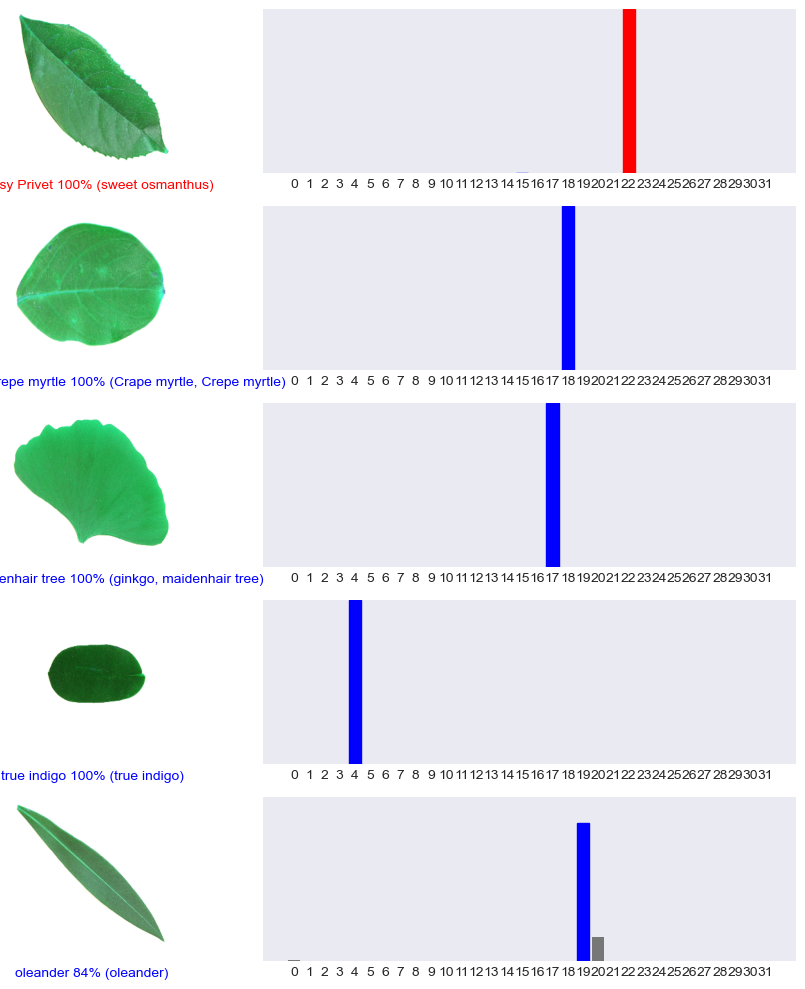

In [91]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
rows = 5
cols = 1
n_images = rows*cols
plt.figure(figsize=(10, 10))
for i in range(n_images):
    plt.subplot(rows, 2*cols, 2*i+1)
    plot_image(i, y_pred[i], y_test, x_test)
    plt.subplot(rows, 2*cols, 2*i+2)
    plot_value_array(i, y_pred[i], y_test)
plt.tight_layout()
plt.show()

In [96]:
# Compile
cnn.compile(optimizer='Adam',
           loss = 'sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [97]:
# Train the model 
history1=cnn.fit(x_train, y_train, epochs=40,validation_data =(x_test,y_test),
                    
                # Boolean (whether to shuffle the training data before each epoch)
                    shuffle = True,
                
                # 1 = progress bar printing
                    verbose = 1)

Epoch 1/40
42/42 [==============================] - 212s 5s/step - loss: 0.0613 - accuracy: 0.9865 - val_loss: 1.1481 - val_accuracy: 0.8010
Epoch 2/40
42/42 [==============================] - 202s 5s/step - loss: 0.0236 - accuracy: 0.9925 - val_loss: 1.4723 - val_accuracy: 0.7976
Epoch 3/40
42/42 [==============================] - 196s 5s/step - loss: 0.0300 - accuracy: 0.9895 - val_loss: 1.5089 - val_accuracy: 0.7871
Epoch 4/40
42/42 [==============================] - 208s 5s/step - loss: 0.0480 - accuracy: 0.9835 - val_loss: 1.4278 - val_accuracy: 0.7853
Epoch 5/40
42/42 [==============================] - 204s 5s/step - loss: 0.0762 - accuracy: 0.9790 - val_loss: 1.0038 - val_accuracy: 0.8045
Epoch 6/40
42/42 [==============================] - 198s 5s/step - loss: 0.0413 - accuracy: 0.9850 - val_loss: 1.4930 - val_accuracy: 0.8010
Epoch 7/40
42/42 [==============================] - 203s 5s/step - loss: 0.0921 - accuracy: 0.9723 - val_loss: 1.0597 - val_accuracy: 0.7784
Epoch 8/40
42

In [105]:
losses = pd.DataFrame(cnn.history.history)

In [106]:
losses.head(8)

,loss,accuracy,val_loss,val_accuracy
0,0.061308,0.986507,1.148125,0.801047
1,0.023608,0.992504,1.472287,0.797557
2,0.029957,0.989505,1.508891,0.787086
3,0.048030,0.983508,1.427810,0.785340
4,0.076224,0.979011,1.003767,0.804538
5,0.041280,0.985008,1.492991,0.801047
6,0.092077,0.972264,1.059746,0.778360
7,0.037395,0.988006,1.148377,0.774869


<AxesSubplot: >

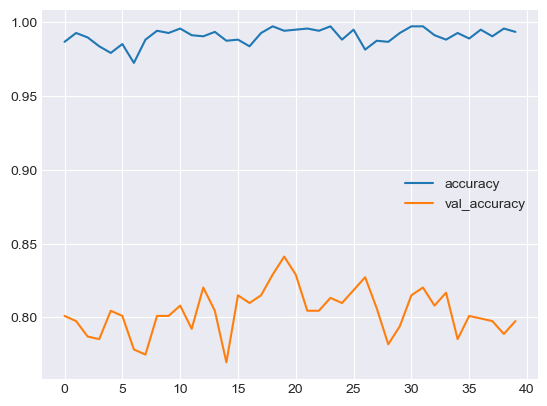

In [107]:
# plot accuracy and val_accuracy wrt the epochs

losses[['accuracy','val_accuracy']].plot()

<AxesSubplot: >

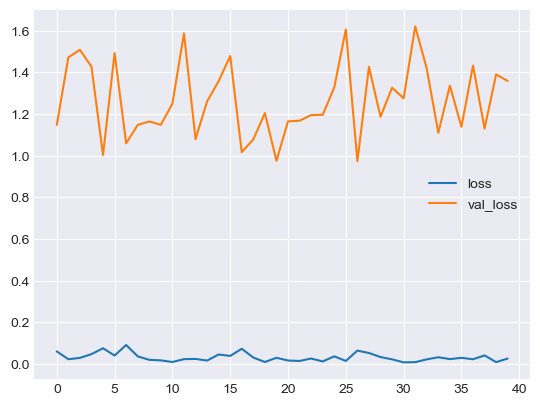

In [108]:
# plot loss and val_loss wrt the epochs

losses[['loss','val_loss']].plot()

In [92]:
optimizers = ['SGD', 'RMSprop', 'Adam', 'Adadelta']
scores = []

In [93]:
for row in optimizers:
    cnn.compile(loss='sparse_categorical_crossentropy', optimizer= row, metrics=['accuracy'])
    cnn.fit(x_train,y_train,epochs=3,validation_data=(x_test,y_test))
    scores.append(cnn.evaluate(x_test,y_test,verbose=0))

Epoch 1/3
42/42 [==============================] - 174s 4s/step - loss: 0.0051 - accuracy: 0.9978 - val_loss: 1.6194 - val_accuracy: 0.8133
Epoch 2/3
42/42 [==============================] - 186s 4s/step - loss: 0.0092 - accuracy: 0.9963 - val_loss: 1.5349 - val_accuracy: 0.8045
Epoch 3/3
42/42 [==============================] - 188s 4s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.6577 - val_accuracy: 0.8098
Epoch 1/3
42/42 [==============================] - 194s 5s/step - loss: 0.1597 - accuracy: 0.9745 - val_loss: 2.2853 - val_accuracy: 0.7958
Epoch 2/3
42/42 [==============================] - 186s 4s/step - loss: 0.0255 - accuracy: 0.9933 - val_loss: 2.3855 - val_accuracy: 0.8150
Epoch 3/3
42/42 [==============================] - 196s 5s/step - loss: 0.0367 - accuracy: 0.9895 - val_loss: 2.3793 - val_accuracy: 0.8045
Epoch 1/3
42/42 [==============================] - 201s 5s/step - loss: 0.0558 - accuracy: 0.9918 - val_loss: 3.7030 - val_accuracy: 0.7696
Epoch 2/3
42/42 [===

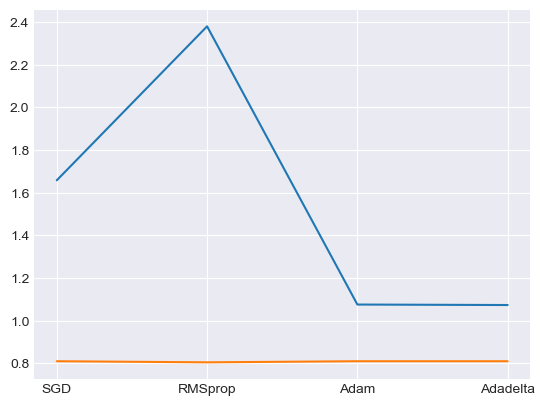

In [94]:
plt.plot (optimizers, scores);

In [63]:
print(scores)

[[4.4890947341918945, 0.7713786959648132], [5.112427711486816, 0.7661430835723877], [3.1420302391052246, 0.7329843044281006], [3.145080327987671, 0.7329843044281006]]
